In [294]:
import urllib
from bs4 import BeautifulSoup
import re
import numpy as np
import sys
import pandas as pd

from PIL import Image
import requests 
import codecs
from six.moves.urllib.request import urlopen
import json

from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_html(url):
    try:
        fp = urllib.request.urlopen(url)
        return fp.read().decode("utf8")
    except:
        return -1


In [4]:
import_t=dict()
for year in range (2013,2021):
    link='https://ru-stat.com/date-Y{0}-{0}/RU/{1}/CN'.format(year,'import')
    twt=get_html(link)
    if twt!=-1:
        for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
            s1=int(el.split(' : ')[0].split('>')[1])
            s2=el.split(' : ')[1].split('</a')[0]
            s3=el.split('<td>')[1].split('</td')[0]
            res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
            d1=import_t.get(s1,dict())
            d1[year]=res
            import_t[s1]=d1
import_t

{1: {2013: 269000000.0,
  2014: 344000000.0,
  2015: 191000000.0,
  2016: 218000000.0,
  2017: 242000000.0,
  2018: 269000000.0,
  2019: 270000000.0,
  2020: 270000000.0},
 2: {2013: 846000000.0,
  2014: 929000000.0,
  2015: 881000000.0,
  2016: 883000000.0,
  2017: 1020000000.0,
  2018: 1030000000.0,
  2019: 944000000.0,
  2020: 944000000.0},
 3: {2013: 4900000.0,
  2014: 5700000.0,
  2015: 4600000.0,
  2016: 5100000.0,
  2017: 5200000.0,
  2018: 7100000.0,
  2019: 6200000.0,
  2020: 6200000.0},
 4: {2013: 569000000.0,
  2014: 639000000.0,
  2015: 460000000.0,
  2016: 498000000.0,
  2017: 504000000.0,
  2018: 592000000.0,
  2019: 504000000.0,
  2020: 504000000.0},
 5: {2013: 212000000.0,
  2014: 108000000.0,
  2015: 136000000.0,
  2016: 98700000.0,
  2017: 137000000.0,
  2018: 206000000.0,
  2019: 269000000.0,
  2020: 269000000.0},
 6: {2013: 1860000000.0,
  2014: 1910000000.0,
  2015: 1760000000.0,
  2016: 1890000000.0,
  2017: 2350000000.0,
  2018: 2840000000.0,
  2019: 3000000000.0

In [5]:
export_t=dict()
for year in range (2013,2021):
    link='https://ru-stat.com/date-Y{0}-{0}/RU/{1}/CN'.format(year,'export')
    twt=get_html(link)
    if twt!=-1:
        for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
            s1=int(el.split(' : ')[0].split('>')[1])
            s2=el.split(' : ')[1].split('</a')[0]
            s3=el.split('<td>')[1].split('</td')[0]
            res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
            d1=export_t.get(s1,dict())
            d1[year]=res
            export_t[s1]=d1
export_t

{1: {2013: 1030000000.0,
  2014: 936000000.0,
  2015: 995000000.0,
  2016: 1050000000.0,
  2017: 1100000000.0,
  2018: 1510000000.0,
  2019: 1860000000.0,
  2020: 1860000000.0},
 2: {2013: 32100000.0,
  2014: 55800000.0,
  2015: 163000000.0,
  2016: 185000000.0,
  2017: 244000000.0,
  2018: 404000000.0,
  2019: 453000000.0,
  2020: 453000000.0},
 3: {2013: 7200000.0,
  2014: 16000000.0,
  2015: 91100000.0,
  2016: 172000000.0,
  2017: 245000000.0,
  2018: 370000000.0,
  2019: 602000000.0,
  2020: 602000000.0},
 4: {2013: 60600000.0,
  2014: 87400000.0,
  2015: 133000000.0,
  2016: 201000000.0,
  2017: 182000000.0,
  2018: 234000000.0,
  2019: 270000000.0,
  2020: 270000000.0},
 5: {2013: 27100000000.0,
  2014: 28900000000.0,
  2015: 19700000000.0,
  2016: 16700000000.0,
  2017: 26400000000.0,
  2018: 42700000000.0,
  2019: 42000000000.0,
  2020: 42000000000.0},
 6: {2013: 1590000000.0,
  2014: 1470000000.0,
  2015: 1320000000.0,
  2016: 974000000.0,
  2017: 1100000000.0,
  2018: 100000

In [15]:
export_r=dict()
for year in range (2013,2021):
    for r in range(1,100):
        link='https://ru-stat.com/date-Y{0}-{0}/RU{1}000/{2}/CN'.format(year,str(r) if r>9 else '0'+str(r),'export')
        twt=get_html(link)
        if twt!=-1:
            if twt.find('Группа товара')>=0:
                s0=twt.split('data-target="#myModalRegion">')[1].split('</button>')[0]
                d0=export_r.get(s0,dict())
                for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
                    s1=int(el.split(' : ')[0].split('>')[1])
                    s2=el.split(' : ')[1].split('</a')[0]
                    s3=el.split('<td>')[1].split('</td')[0]
                    res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
                    d1=d0.get(s1,dict())
                    d1[year]=res
                    d0[s1]=d1
                export_r[s0]=d0
export_r

{'Алтайский край': {1: {2013: 857000.0,
   2014: 796000.0,
   2015: 4500000.0,
   2016: 21600000.0,
   2017: 1500000.0,
   2018: 642000.0,
   2019: 3700000.0,
   2020: 3700000.0},
  2: {2013: 3500000.0,
   2014: 1200000.0,
   2015: 1500000.0,
   2016: 12500000.0,
   2017: 21700000.0,
   2018: 41900000.0,
   2019: 70300000.0,
   2020: 70300000.0},
  3: {2013: 0,
   2014: 4400000.0,
   2015: 17900000.0,
   2016: 24800000.0,
   2017: 5700000.0,
   2018: 15800000.0,
   2019: 20900000.0,
   2020: 20900000.0},
  4: {2013: 35200.0,
   2014: 110000.0,
   2015: 1100000.0,
   2016: 962000.0,
   2017: 1400000.0,
   2018: 1400000.0,
   2019: 1200000.0,
   2020: 1200000.0},
  5: {2013: 24400000.0,
   2014: 22000000.0,
   2015: 20400000.0,
   2016: 17300000.0,
   2017: 7600000.0,
   2018: 25100000.0,
   2019: 14800000.0,
   2020: 14800000.0},
  6: {2013: 12.0,
   2014: 559000.0,
   2015: 335000.0,
   2016: 272000.0,
   2017: 1100000.0,
   2018: 0,
   2019: 0,
   2020: 0},
  7: {2013: 46.0,
   2014: 

In [16]:
import_r=dict()
for year in range (2013,2021):
    for r in range(1,100):
        link='https://ru-stat.com/date-Y{0}-{0}/RU{1}000/{2}/CN'.format(year,str(r) if r>9 else '0'+str(r),'import')
        twt=get_html(link)
        if twt!=-1:
            if twt.find('Группа товара')>=0:
                s0=twt.split('data-target="#myModalRegion">')[1].split('</button>')[0]
                d0=import_r.get(s0,dict())
                for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
                    s1=int(el.split(' : ')[0].split('>')[1])
                    s2=el.split(' : ')[1].split('</a')[0]
                    s3=el.split('<td>')[1].split('</td')[0]
                    res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
                    d1=d0.get(s1,dict())
                    d1[year]=res
                    d0[s1]=d1
                import_r[s0]=d0
import_r

{'Алтайский край': {1: {2013: 114000.0,
   2014: 67800.0,
   2015: 0,
   2016: 58800.0,
   2017: 96000.0,
   2018: 92700.0,
   2019: 371000.0,
   2020: 371000.0},
  2: {2013: 3300000.0,
   2014: 7000000.0,
   2015: 9900000.0,
   2016: 8600000.0,
   2017: 14300000.0,
   2018: 14500000.0,
   2019: 12400000.0,
   2020: 12400000.0},
  3: {2013: 277000.0,
   2014: 47200.0,
   2015: 0,
   2016: 0,
   2017: 0,
   2018: 0,
   2019: 0,
   2020: 0},
  4: {2013: 2200000.0,
   2014: 5000000.0,
   2015: 3100000.0,
   2016: 3300000.0,
   2017: 2800000.0,
   2018: 1900000.0,
   2019: 2300000.0,
   2020: 2300000.0},
  5: {2013: 970.0,
   2014: 131.0,
   2015: 1520.0,
   2016: 2370.0,
   2017: 7740.0,
   2018: 29100.0,
   2019: 362000.0,
   2020: 362000.0},
  6: {2013: 18800000.0,
   2014: 19500000.0,
   2015: 13200000.0,
   2016: 14600000.0,
   2017: 15000000.0,
   2018: 17100000.0,
   2019: 15100000.0,
   2020: 15100000.0},
  7: {2013: 18100000.0,
   2014: 10600000.0,
   2015: 7700000.0,
   2016: 100

In [17]:
import json


In [18]:

with open('import_t.json', 'w') as fp:
    json.dump(import_t, fp)

In [19]:

with open('import_r.json', 'w') as fp:
    json.dump(import_r, fp)

In [20]:

with open('export_t.json', 'w') as fp:
    json.dump(export_t, fp)
with open('export_r.json', 'w') as fp:
    json.dump(export_r, fp)

In [139]:
df=pd.read_excel('https://github.com/rufimich/CO2_Russia-China/raw/main/RassianData.xlsx',sheet_name='CO2',usecols='A:P',nrows=28, engine='openpyxl')
df.head()

,ID,Product,ID Analogue,Analogue,Emission,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1.0,Продукты животного происхождения,1.0,"Agriculture, forestry, animal husbandry and fi...",Сельское хозяйство,104.900,103.500,106.200,105.200,107.700,107.500,108.600,112.500,113.100,112.800,114.200
1,2.0,Продукты растительного происхождения,1.0,"Agriculture, forestry, animal husbandry and fi...",Сельское хозяйство,104.900,103.500,106.200,105.200,107.700,107.500,108.600,112.500,113.100,112.800,114.200
2,3.0,Жиры и масла,1.0,"Agriculture, forestry, animal husbandry and fi...",Сельское хозяйство,104.900,103.500,106.200,105.200,107.700,107.500,108.600,112.500,113.100,112.800,114.200
3,4.0,"Пищевые продукты, напитки, табак",6.0,Food and tobacco,производство и использование другой продукции,0.867,1.046,1.079,1.092,1.121,1.222,1.231,1.288,1.397,1.443,1.581
4,5.0,Минеральные продукты,2.0,Coal mining products,производство продукции из минерального сырья,36.201,36.516,39.453,41.440,42.865,42.406,39.409,35.581,36.106,36.896,36.324


In [101]:
course=pd.read_excel('https://github.com/rufimich/CO2_Russia-China/raw/main/RassianData.xlsx',sheet_name='Course',usecols='A:H',nrows=3, engine='openpyxl')
course

,Fin,2013,2014,2015,2016,2017,2018,2019
0,USD,31.8480,38.4217,60.9579,67.0349,58.3529,62.7078,64.7362
1,CNY,5.1814,6.2363,9.6933,10.1062,8.6355,9.4723,9.3760


In [157]:
CO2=df.loc[0:21]
coef=df[df.columns[5:]].loc[26]/df[df.columns[5:]].loc[25]
CO2m=np.array(CO2[range(2013,2020)])
export=pd.DataFrame(export_t).T
ems=np.array(CO2.Emission)

In [158]:
for el in range(2013,2020):
    CO2[el]=[CO2m[x-1,el-2013]*coef[el]*export[el].loc[x]/export[el][ems==ems[x-1]].sum() for x in range(1,23)]
#list(map(lambda x:x[1]*coef[el],np.array(CO2[['Emission',el]]))))

In [159]:
CO2[['Product']+list(range(2013,2020))]

,Product,2013,2014,2015,2016,2017,2018,2019
0,Продукты животного происхождения,82.441510,79.490870,68.967508,66.704263,62.231202,59.125472,57.740655
1,Продукты растительного происхождения,2.569294,4.738879,11.298195,11.752656,13.804012,15.819000,14.062643
2,Жиры и масла,0.576290,1.358818,6.314513,10.926794,13.860586,14.487698,18.688105
3,"Пищевые продукты, напитки, табак",0.010809,0.015797,0.023562,0.033017,0.023232,0.032540,0.037212
4,Минеральные продукты,34.063981,33.762500,31.418413,28.269883,28.698300,29.252565,28.782922
5,Продукция химической промышленности,36.079809,35.547701,34.404381,33.833207,37.872300,41.837017,41.261009
6,"Пластмассы, каучук и резина",11.595461,10.035575,9.956419,11.914569,16.973676,19.830746,15.651903
7,Изделия из кожи и меха,0.005387,0.002079,0.003189,0.001413,0.000587,0.000820,0.001199
8,Древесина и изделия из нее,0.397775,0.453660,0.393285,0.420520,0.416135,0.493660,0.468592
9,"Книги, бумага, картон",0.132889,0.146039,0.146330,0.124349,0.114756,0.176605,0.130655


In [160]:
dfd=pd.read_excel('https://github.com/rufimich/CO2_Russia-China/raw/main/RassianData.xlsx',sheet_name='Value',usecols='A:S',nrows=23, engine='openpyxl')
valm=np.array(dfd[range(2013,2020)])
vals=np.array(dfd.Analogue)

In [161]:
for el in range(2013,2020):
    dfd[el]=[valm[x-1,el-2013]/course.loc[0][el]*export[el].loc[x]/export[el][vals==vals[x-1]].sum() for x in range(1,23)]

dfd[['Product']+list(range(2013,2020))]

,Product,2013,2014,2015,2016,2017,2018,2019
0,Продукты животного происхождения,122271.016552,107659.746310,71753.580359,63041.173607,67605.436781,64999.912754,67151.528345
1,Продукты растительного происхождения,3810.582166,6418.177184,11754.606632,11107.254397,14996.115068,17390.705134,16354.646419
2,Жиры и масла,854.710019,1840.337544,6569.599167,10326.744629,15057.574556,15927.130940,21733.989281
3,"Пищевые продукты, напитки, табак",7193.809323,10052.843833,9591.182098,12067.881805,11185.626813,10072.834162,9747.802502
4,Минеральные продукты,189359.174830,178233.316069,115835.568483,101710.735751,140572.362299,165807.363677,158390.801666
5,Продукция химической промышленности,59225.571464,54717.021891,45389.260457,38096.364729,47000.114819,52080.171845,50674.052709
6,"Пластмассы, каучук и резина",21048.511680,18006.803447,15009.457347,14186.834022,17474.538541,18506.836470,18823.361052
7,Изделия из кожи и меха,1655.534472,1293.855768,1063.657874,1027.795317,1222.195273,1258.968952,1158.764564
8,Древесина и изделия из нее,11848.342125,10294.390930,8316.707104,7781.573479,9402.223369,10736.925869,11033.709752
9,"Книги, бумага, картон",24046.093946,21448.218064,17961.986879,14421.368571,17549.084964,18899.451105,18764.602598


In [162]:
exportCO2=export.copy()
for el in range(2013,2020):
    exportCO2[el]=exportCO2[el]*np.array(CO2[el]/dfd[el])
exportCO2['Product']=np.array(CO2['Product'])
exportCO2[['Product']+list(range(2013,2020))]

,Product,2013,2014,2015,2016,2017,2018,2019
1,Продукты животного происхождения,6.944798e+05,6.910982e+05,9.563658e+05,1.111012e+06,1.012556e+06,1.373532e+06,1.599332e+06
2,Продукты растительного происхождения,2.164350e+04,4.120008e+04,1.566710e+05,1.957497e+05,2.246034e+05,3.674880e+05,3.895148e+05
3,Жиры и масла,4.854616e+03,1.181364e+04,8.756274e+04,1.819943e+05,2.255239e+05,3.365608e+05,5.176334e+05
4,"Пищевые продукты, напитки, табак",9.105806e+01,1.373380e+02,3.267276e+02,5.499306e+02,3.780067e+02,7.559266e+02,1.030712e+03
5,Минеральные продукты,4.875042e+06,5.474489e+06,5.343287e+06,4.641664e+06,5.389645e+06,7.533348e+06,7.632279e+06
6,Продукция химической промышленности,9.686170e+05,9.550067e+05,1.000540e+06,8.650049e+05,8.863708e+05,8.033195e+05,9.852344e+05
7,"Пластмассы, каучук и резина",2.815059e+05,2.312883e+05,2.533970e+05,2.880627e+05,4.788694e+05,5.079082e+05,3.816653e+05
8,Изделия из кожи и меха,9.826701e+01,1.847425e+01,5.396320e+01,1.182053e+01,2.209999e+00,3.844932e+00,9.002427e+00
9,Древесина и изделия из нее,7.486593e+04,1.106124e+05,1.049806e+05,1.383437e+05,1.442852e+05,1.632211e+05,1.443951e+05
10,"Книги, бумага, картон",4.117182e+03,5.501593e+03,6.729153e+03,6.527277e+03,5.878709e+03,1.186746e+04,6.600755e+03


In [163]:
products=['Animal husbandry and fishery products and services','Agriculture products and services',
          'Fats and oils','Food, beverages, tobacco','Mineral products','Chemical products',
          'Plastics, rubber and rubber','Leather and fur products','Wood work and furniture',
          'Books, paper, cardboard','textile','Shoes, hats, umbrellas, etc','Products made of stone, ceramics and glass',
          'Jewelry','Metal products, machinery and equipment repair services','Machinery, equipment','Transport',
          'Tools and devices, watches','Weapons and ammunition','Various industrial products','Works of art and antiques',
          'Special section']

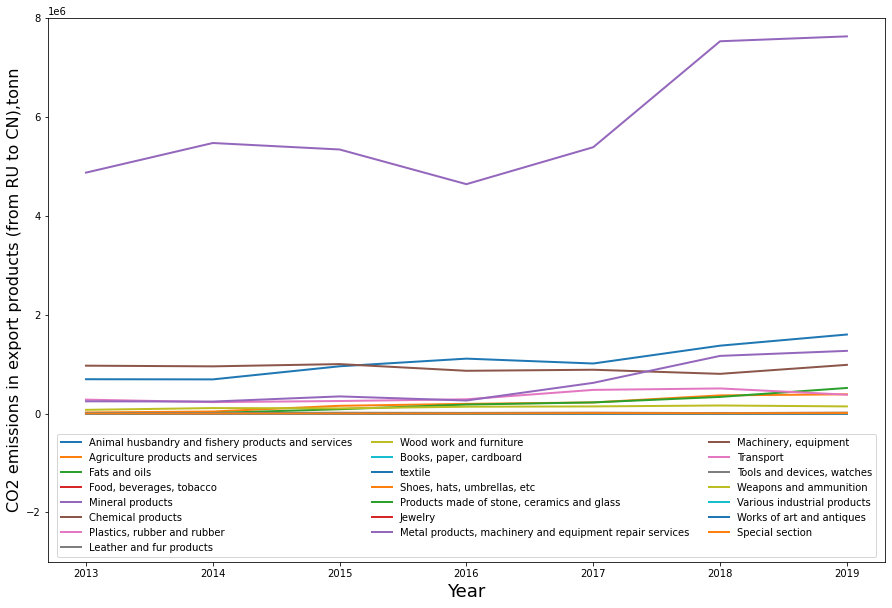

In [165]:
plt.figure(figsize=(15,10))
plt.plot(exportCO2[range(2013,2020)].T,linewidth=2)
plt.xlabel('Year',fontsize=18)
plt.legend(products,ncol=3,loc='lower center')
plt.ylabel('CO2 emissions in export products (from RU to CN),tonn',fontsize=16)
plt.ylim(-3e6,8e6)
plt.show()

In [166]:
imprt=pd.DataFrame(import_t).T
importCO2=imprt.copy()
for el in range(2013,2020):
    importCO2[el]=importCO2[el]*np.array(CO2[el]/dfd[el])
importCO2['Product']=np.array(CO2['Product'])
importCO2[['Product']+list(range(2013,2020))]

,Product,2013,2014,2015,2016,2017,2018,2019
1,Продукты животного происхождения,1.813739e+05,2.539933e+05,1.835838e+05,2.306672e+05,2.227624e+05,2.446888e+05,2.321612e+05
2,Продукты растительного происхождения,5.704174e+05,6.859297e+05,8.467922e+05,9.343079e+05,9.389160e+05,9.369126e+05,8.117042e+05
3,Жиры и масла,3.303836e+03,4.208611e+03,4.421390e+03,5.396342e+03,4.786631e+03,6.458329e+03,5.331108e+03
4,"Пищевые продукты, напитки, табак",8.549841e+02,1.004108e+03,1.130035e+03,1.362515e+03,1.046788e+03,1.912430e+03,1.923995e+03
5,Минеральные продукты,3.813686e+04,2.045830e+04,3.688767e+04,2.743307e+04,2.796899e+04,3.634355e+04,4.888293e+04
6,Продукция химической промышленности,1.133099e+06,1.240859e+06,1.334054e+06,1.678500e+06,1.893610e+06,2.281427e+06,2.442730e+06
7,"Пластмассы, каучук и резина",1.377230e+06,1.454609e+06,1.048082e+06,1.394122e+06,1.903822e+06,2.507395e+06,2.070472e+06
8,Изделия из кожи и меха,2.824363e+03,1.138978e+03,1.295117e+03,5.113068e+02,2.613564e+02,3.923134e+02,6.415523e+02
9,Древесина и изделия из нее,1.154883e+04,1.586472e+04,7.187864e+03,7.133346e+03,6.107777e+03,6.482867e+03,6.030621e+03
10,"Книги, бумага, картон",2.155303e+03,2.607809e+03,1.930762e+03,2.207375e+03,1.791731e+03,3.205149e+03,2.409136e+03


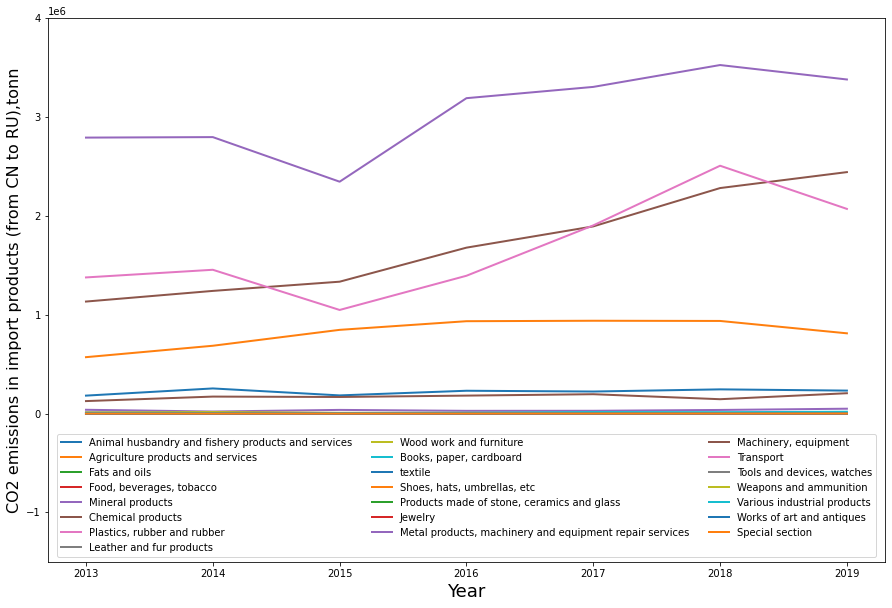

In [167]:
plt.figure(figsize=(15,10))
plt.plot(importCO2[range(2013,2020)].T,linewidth=2)
plt.xlabel('Year',fontsize=18)
plt.legend(products,ncol=3,loc='lower center')
plt.ylabel('CO2 emissions in import products (from CN to RU),tonn',fontsize=16)
plt.ylim(-1.5e6,4e6)
plt.show()

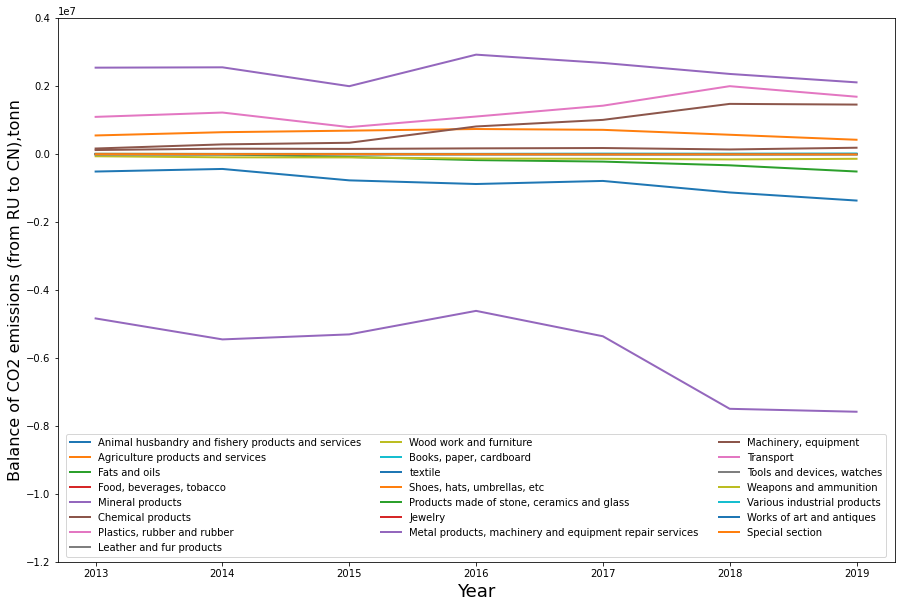

In [170]:
plt.figure(figsize=(15,10))
plt.plot((importCO2[range(2013,2020)]-exportCO2[range(2013,2020)]).T,linewidth=2)
plt.xlabel('Year',fontsize=18)
plt.legend(products,ncol=3,loc='lower center')
plt.ylabel('Balance of CO2 emissions (from RU to CN),tonn',fontsize=16)
plt.ylim(-12e6,4e6)
plt.show()

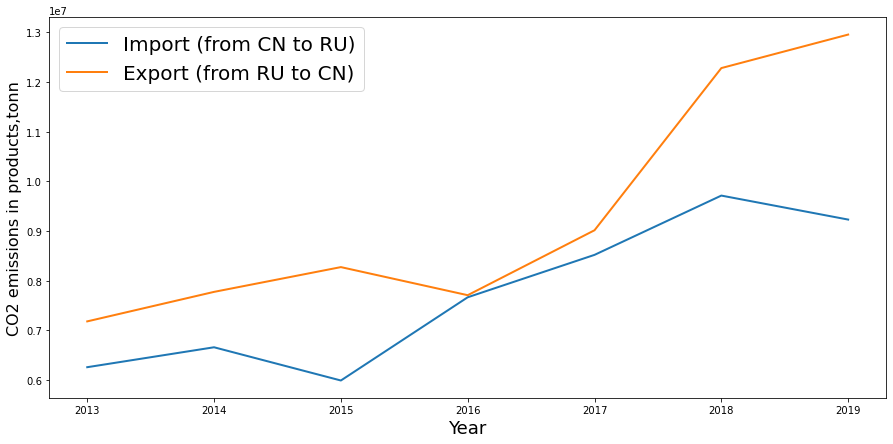

In [171]:
plt.figure(figsize=(15,7))
plt.plot(importCO2[range(2013,2020)].sum(),linewidth=2)
plt.plot(exportCO2[range(2013,2020)].sum(),linewidth=2)
plt.xlabel('Year',fontsize=18)
plt.legend(['Import (from CN to RU)','Export (from RU to CN)'],fontsize=20)
plt.ylabel('CO2 emissions in products,tonn',fontsize=16)
plt.show()

In [173]:
reader = codecs.getreader("utf-8")
f = urlopen('https://raw.githubusercontent.com/Kreozot/russian-geo-data/master/geo.json')
geometry = json.load(reader(f))
f.close()


In [218]:
regs=[77,59,21,5,66,-1,22,60,23,1,76,0,6,7,8,55,9,70,56,78,51,53,67,27,74,58,-1,15,57,17,-1,19,25,26,28,72,29,61,62,21,30,32,
      -1,14,63,33,34,35,37,36,38,3,40,41,42,68,44,24,43,46,4,45,75,64,47,48,79,18,49,65,50,10,11,12,13,-1,54,69,73,71,2,16,52,
      20,39]
nregs=list(export_r.keys())
np.array(list([[x[0],x[1]['properties']['NAME_1'],None if regs[x[0]]==-1 else nregs[regs[x[0]]]] for x in enumerate(geometry["features"])]))

array([[0, 'Karachay-Cherkess', 'Карачаево-Черкесская республика'],
       [1, 'Karelia', 'Карелия'],
       [2, 'Kemerovo', 'Кемеровская область'],
       [3, 'Khabarovsk', 'Хабаровский край'],
       [4, 'Khakass', 'Хакасия'],
       [5, 'Khanty-Mansiy', None],
       [6, 'Kirov', 'Кировская область'],
       [7, 'Komi', 'Коми'],
       [8, 'Kostroma', 'Костромская область'],
       [9, 'Krasnodar', 'Краснодарский край'],
       [10, 'Adygey', 'Адыгея'],
       [11, 'Altay', 'Алтайский край'],
       [12, 'Amur', 'Амурская область'],
       [13, "Arkhangel'sk", 'Архангельская область'],
       [14, "Astrakhan'", 'Астраханская область'],
       [15, 'Bashkortostan', 'Башкирия'],
       [16, 'Belgorod', 'Белгородская область'],
       [17, 'Bryansk', 'Брянская область'],
       [18, 'Buryat', 'Бурятия'],
       [19, 'Chechnya', 'Чеченская республика'],
       [20, 'Chelyabinsk', 'Челябинская область'],
       [21, 'Chukot', 'Чукотский АО'],
       [22, 'Chuvash', 'Чувашия'],
       [23

In [256]:
dfd.index=dfd.ID

In [257]:
CO2.index=CO2.ID

In [271]:
dict(zip(years,[0]*len(years)))

{2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 0}

In [275]:
years=range(2013,2020)
for el in export_r:
    for pr in range(22):
        for yr in years:
            export_r[el][pr+1][yr]=export_r[el][pr+1].get(yr,0)
for el in import_r:
    for pr in range(22):
        for yr in years:
            import_r[el][pr+1][yr]=import_r[el][pr+1].get(yr,0)


In [263]:
def get_vals(cat,prd,reg,years):
    if regs[reg]==-1:
        return [0]*len(years)
    else:
        dde=pd.DataFrame(export_r[nregs[regs[reg]]]).T[years]*CO2[years]/dfd[years]
        ddi=pd.DataFrame(import_r[nregs[regs[reg]]]).T[years]*CO2[years]/dfd[years]
        if prd==-1:
            ddfe=dict(dde.sum())
            ddfi=dict(ddi.sum())
        else:
            ddfe=dict(dde.loc[prd])
            #export_r[nregs[regs[reg]]].get(prd,dict(zip(years,[0]*len(years))))
            ddfi=dict(ddi.loc[prd])
            #import_r[nregs[regs[reg]]].get(prd,dict(zip(years,[0]*len(years))))
        
        if cat=='export':
            return [ddfe.get(el,0) for el in years]
        elif cat=='import':
            return [ddfi.get(el,0) for el in years]
        else:
            return [ddfi.get(el,0)-ddfe.get(el,0) for el in years]

        
    

In [264]:
def get_map(cat='export',prd=-1,years=range(2013,2020)): #cat=export/import/balance, prd=-1 - all products / 0..21 - products
    df_rep=pd.DataFrame([[x[1]['properties']['NAME_1']]+get_vals(cat,prd,x[0],years) for x in enumerate(geometry["features"])],
             columns=['NAME_1']+list(years))
    df_rep.index=df_rep['NAME_1']
    df_rep['mean']=df_rep[df_rep.columns[1:]].mean(axis=1)
    return df_rep

In [338]:
def plot_map(df_rep,year='mean',title='',scale='log'):
    fig, ax = plt.subplots(figsize=(20,8))
    ppatches=[]
    ppatchesw=[]
    colors=[]
    iii=-1
    for feature in geometry['features']:
        nnn=feature['properties']['NAME_1']
        rrr=df_rep.loc[nnn][year]
        if feature['geometry']['type']=='Polygon':
            iii+=1
            pole=np.array(feature['geometry']['coordinates'][0]).T
        
            if len(pole.shape)!=2:
                pole=np.array([np.array(pole[0]).T[0],np.array(pole[1]).T[0]])
            if rrr!=0:
                ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
                colors.append(rrr)
            else:
                ppatchesw.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
                

        elif feature['geometry']['type']=='MultiPolygon':
            iii+=1
            for eel in np.array(feature['geometry']['coordinates']):
                for el in eel:
                    pole=np.array(el).T
                    pole[0]=np.array(list(map(lambda x: x if x>0 else x+360,pole[0])))
                    if len(pole.shape)!=2:
                        pole=np.array([np.array(pole[0]).T[0],np.array(pole[1]).T[0]])
                    if rrr!=0:
                        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
                        colors.append(rrr)
                    else:
                        ppatchesw.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))

        
        else:
            print (feature['properties']['NAME_1'])
    if scale=='log':
        p = PatchCollection(ppatches, edgecolor="#000000", alpha=1, cmap=matplotlib.cm.jet, norm=matplotlib.colors.LogNorm(), lw=0) #color="#25CDCD", 
    else:
        p = PatchCollection(ppatches, edgecolor="#000000", alpha=1, cmap=matplotlib.cm.jet) #color="#25CDCD", SymLogNorm
        
    p.set_array(np.array(colors))
    ax.add_collection(p)

    pp = PatchCollection(ppatchesw, color="#FFFFFF",edgecolor="#000000", alpha=0.5) #color="#25CDCD", 
    ax.add_collection(pp)
    
    
    
    plt.colorbar(p)
    #ax.add_collection(p)
    ax.set_xlim((20,195))
    ax.set_ylim((40,85))
    plt.title(title,fontsize=20)
    plt.show()

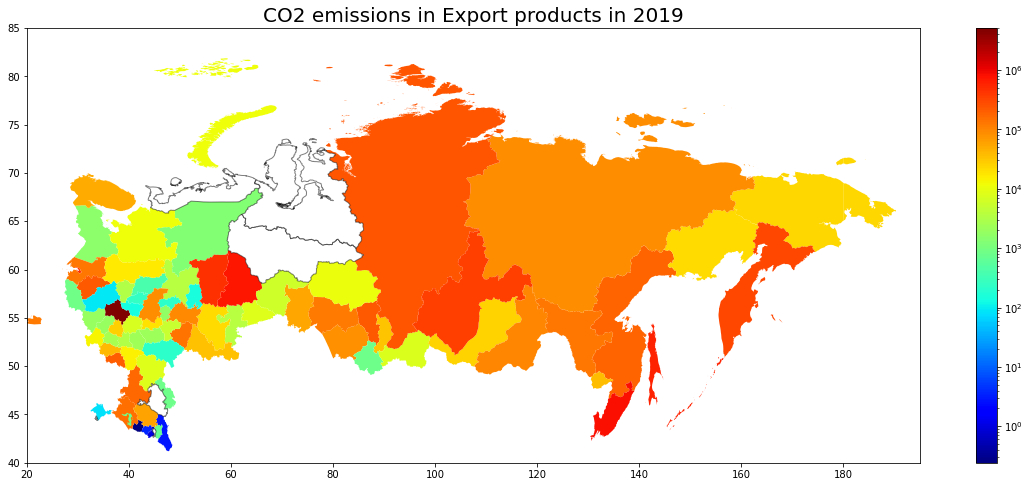

In [339]:
dfr=get_map(cat='export')
plot_map(dfr,year=2019,title='CO2 emissions in Export products in 2019')

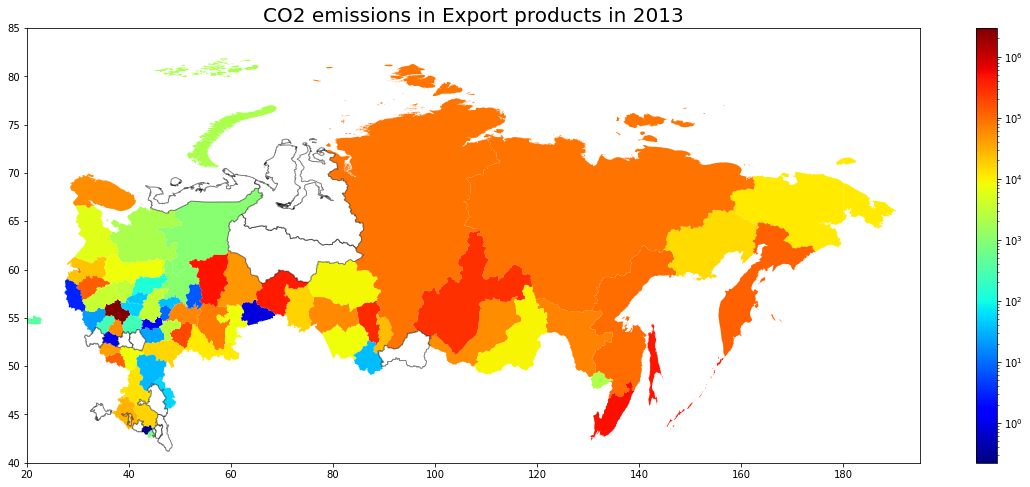

In [340]:
dfr=get_map(cat='export')
plot_map(dfr,year=2013,title='CO2 emissions in Export products in 2013')

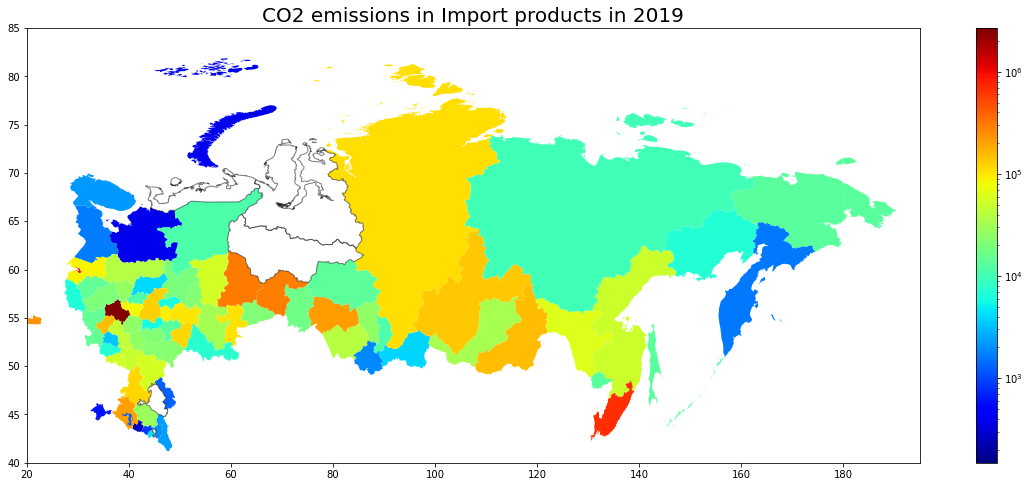

In [341]:
dfr=get_map(cat='import')
plot_map(dfr,year=2019,title='CO2 emissions in Import products in 2019')


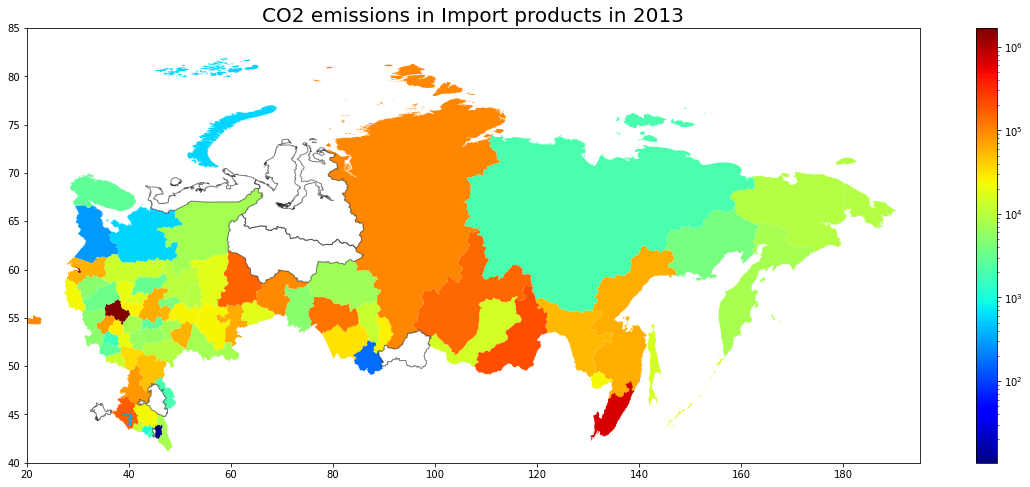

In [342]:
dfr=get_map(cat='import')
plot_map(dfr,year=2013,title='CO2 emissions in Import products in 2013')


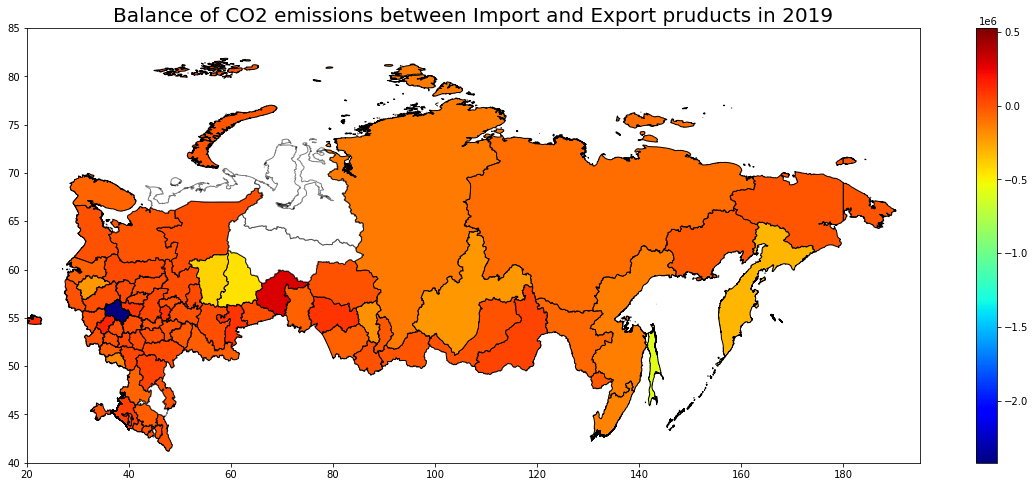

In [343]:
dfr=get_map(cat='balance')
plot_map(dfr,year=2019,title='Balance of CO2 emissions between Import and Export pruducts in 2019',scale='norm')


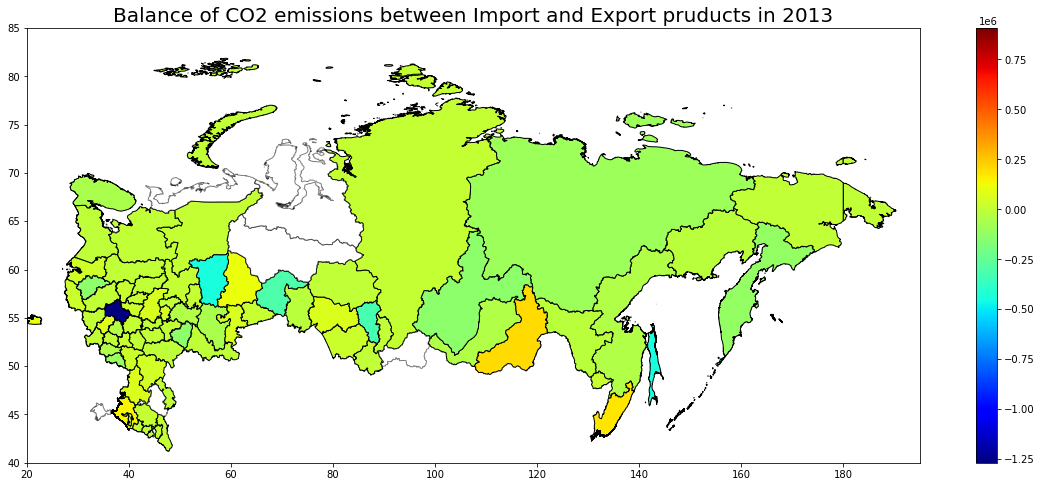

In [344]:
dfr=get_map(cat='balance')
plot_map(dfr,year=2013,title='Balance of CO2 emissions between Import and Export pruducts in 2013',scale='norm')


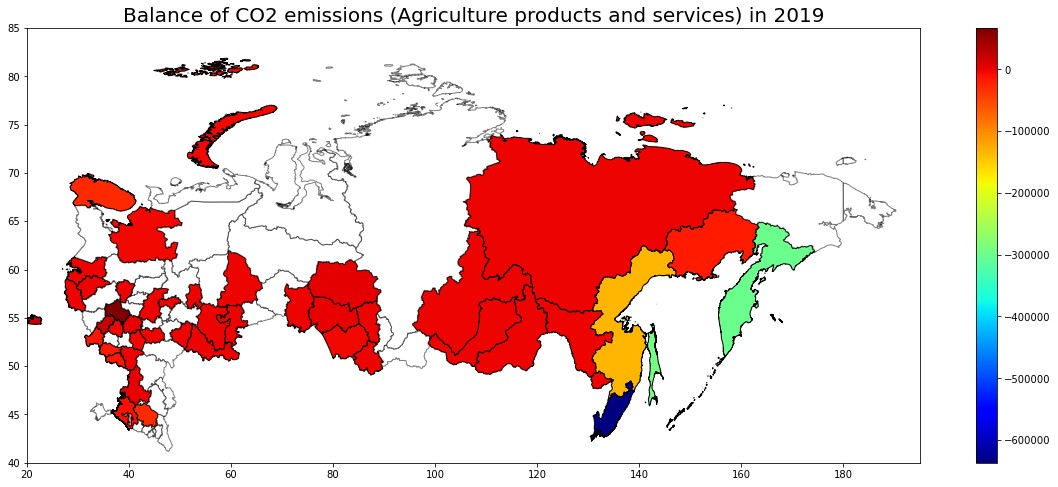

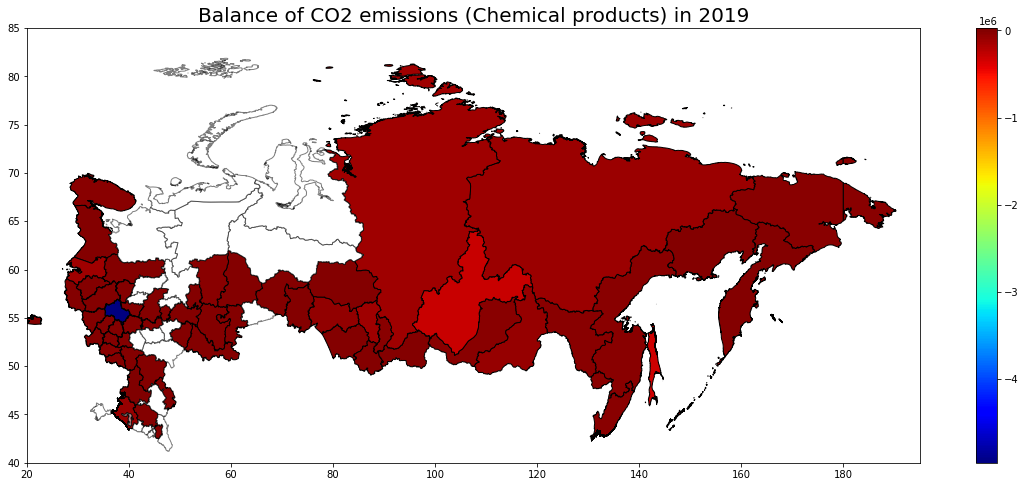

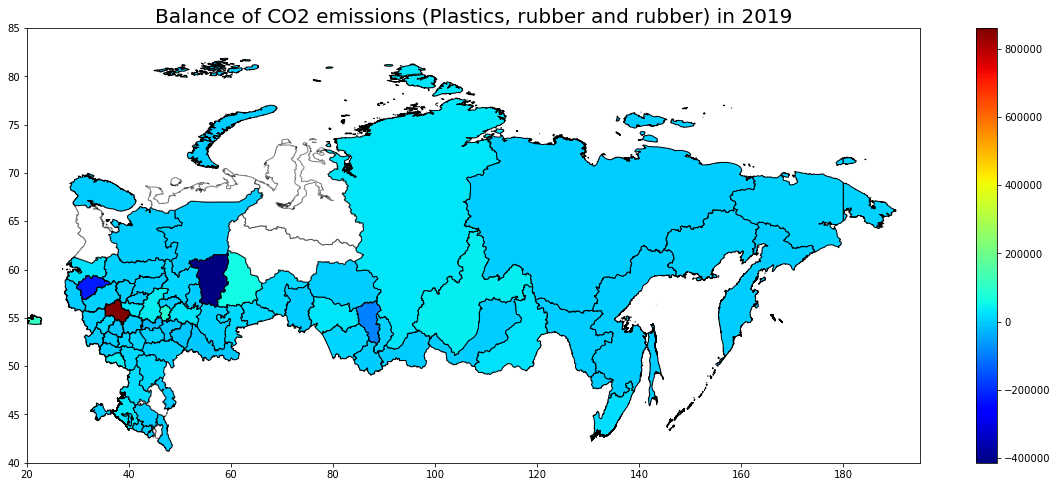

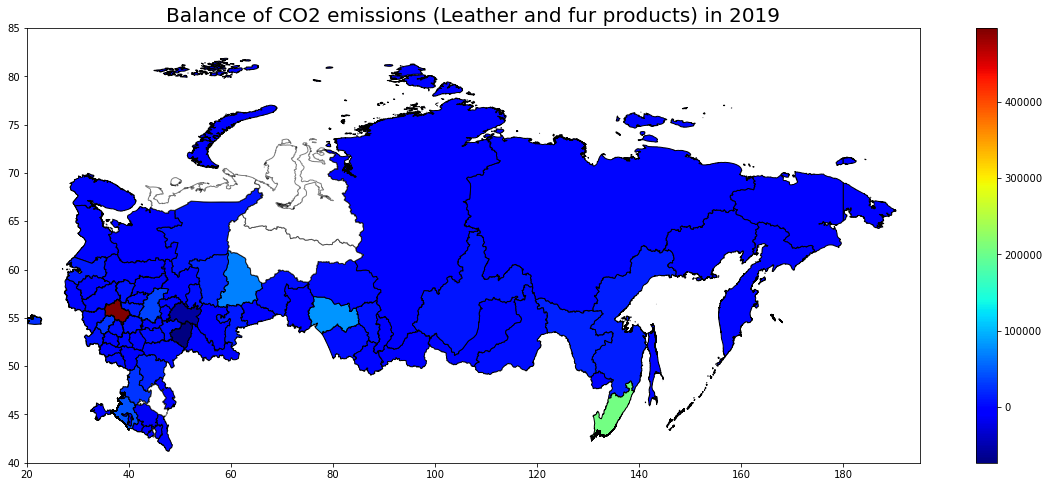

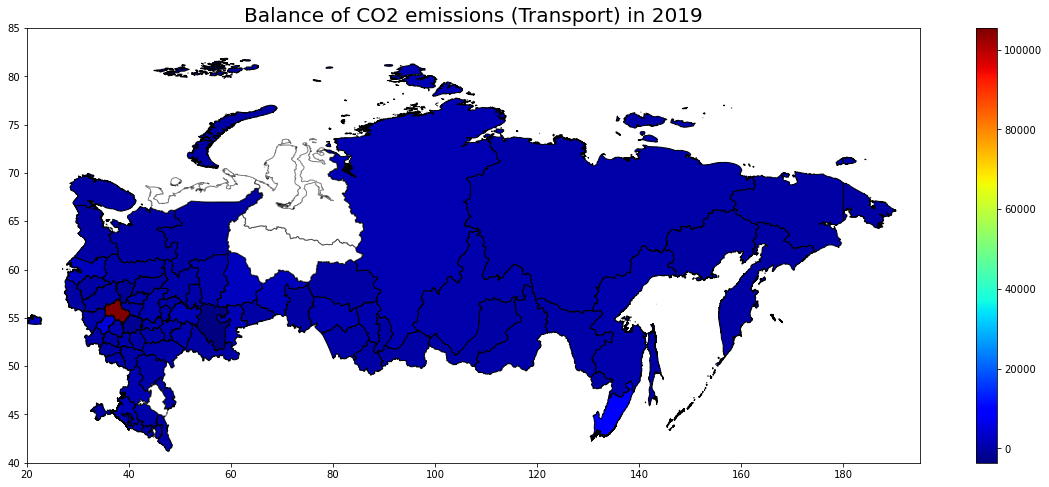

In [345]:
for el in [1,5,6,7,16]:
    dfr=get_map(cat='balance',prd=el)
    plot_map(dfr,year=2019,title='Balance of CO2 emissions ('+products[el]+') in 2019',scale='norm')


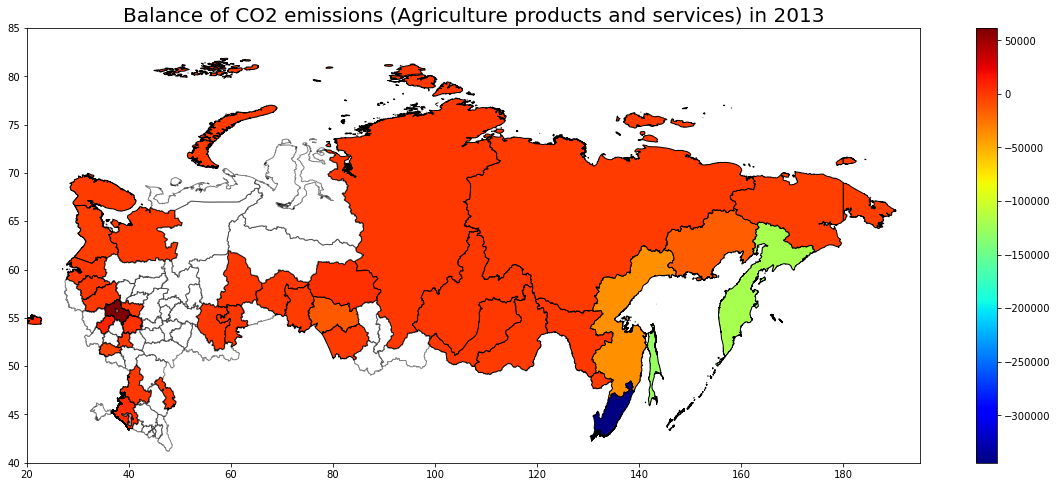

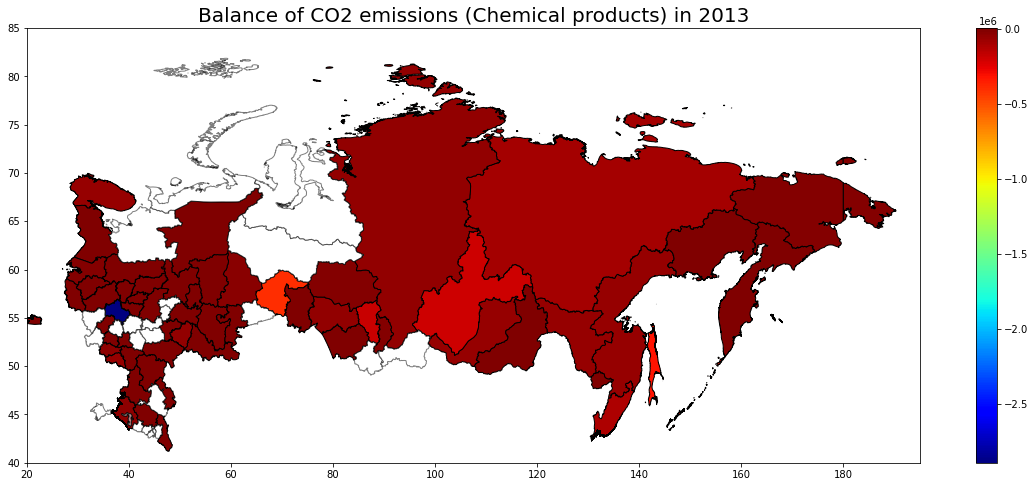

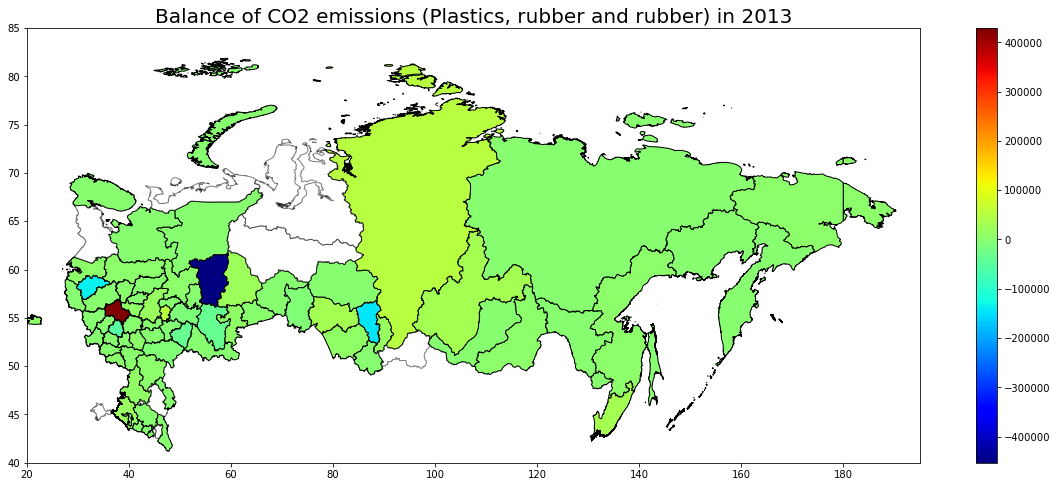

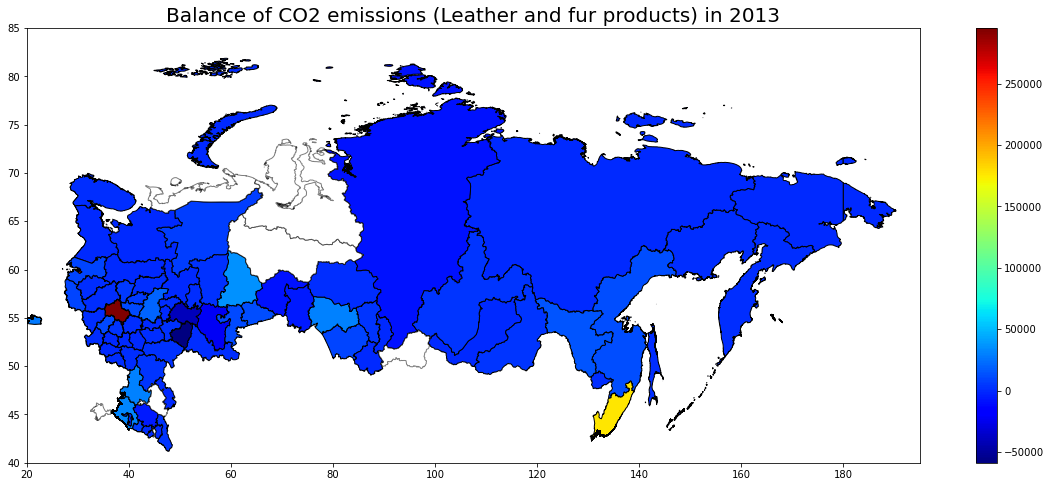

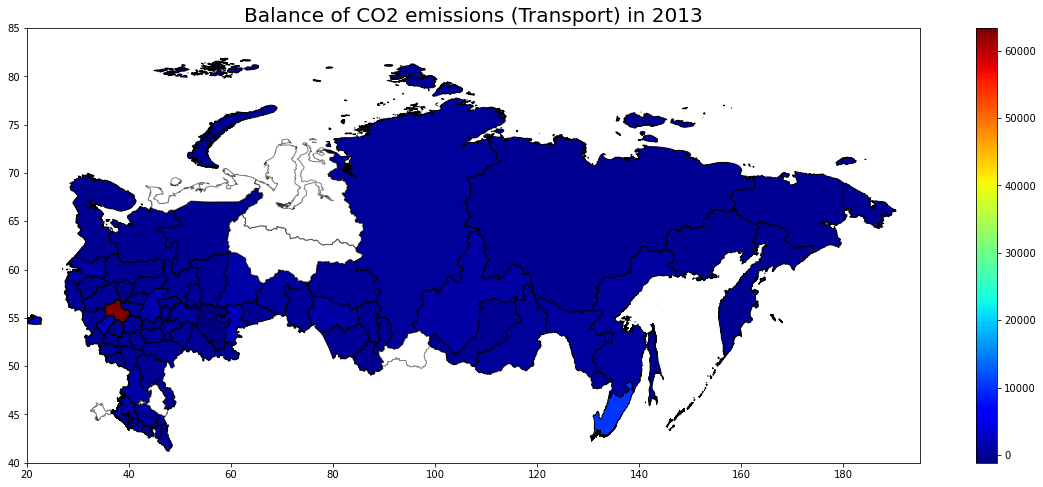

In [346]:
for el in [1,5,6,7,16]:
    dfr=get_map(cat='balance',prd=el)
    plot_map(dfr,year=2013,title='Balance of CO2 emissions ('+products[el]+') in 2013',scale='norm')
